# Sommaire :

<a href="#A5">**Part 5 : Image classification**</a>

- <a href="#C51">5-1 : Input</a>
- <a href="#C52">5-2 : SIFT</a>
- <a href="#C53">5-3 : CNN</a>

In [ ]:
pip uninstall opencv-python

In [ ]:
pip install opencv-contrib-python

In [ ]:
# General
import numpy as np
import pandas as pd
import os
from os import listdir
import time

# Préprocessing
from sklearn import preprocessing

# Visualisation
from matplotlib.image import imread
import matplotlib.pyplot as plt

# Modèle 
import cv2

In [2]:
# Product description (cleaned)
df = pd.read_csv("df.csv")

In [10]:
# Images
im = r"C:\Users\John\Desktop\Formation\6-Classifiez automatiquement des biens de consommation\1-Projet_6\Images"
list_photos = [file for file in listdir(im)]
print(len(list_photos))

1050


## <a name="#C51">5-1 : Input</a>

In [23]:
df.image

0       55b85ea15a1536d46b7190ad6fff8ce7.jpg
1       7b72c92c2f6c40268628ec5f14c6d590.jpg
2       d4684dcdc759dd9cdf41504698d737d8.jpg
3       6325b6870c54cd47be6ebfbffa620ec7.jpg
4       893aa5ed55f7cff2eccea7758d7a86bd.jpg
                        ...                 
1043    958f54f4c46b53c8a0a9b8167d9140bc.jpg
1044    fd6cbcc22efb6b761bd564c28928483c.jpg
1045    5912e037d12774bb73a2048f35a00009.jpg
1046    c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1047    f2f027ad6a6df617c9f125173da71e44.jpg
Name: image, Length: 1048, dtype: object

In [11]:
# LabelEncoding of the categories 'class_'
le = preprocessing.LabelEncoder()
df["label"] = le.fit_transform(df["class_"])

In [26]:
list_labels = list(set(df.class_))
list_labels

['Kitchen & Dining',
 'Baby Care',
 'Home Decor & Festive Needs',
 'Computers',
 'Beauty and Personal Care',
 'Watches',
 'Home Furnishing']

Kitchen & Dining


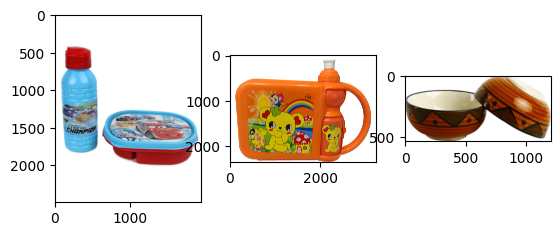

Baby Care


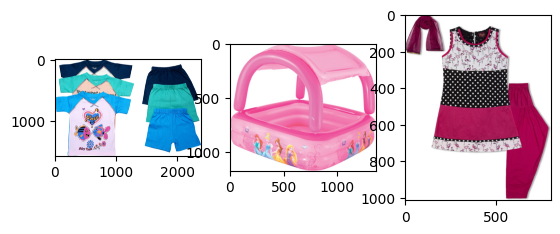

Home Decor & Festive Needs


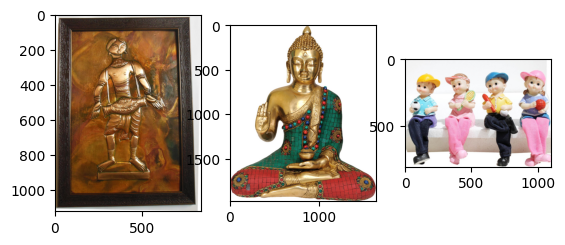

Computers


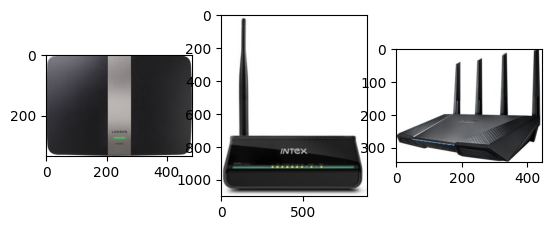

Beauty and Personal Care


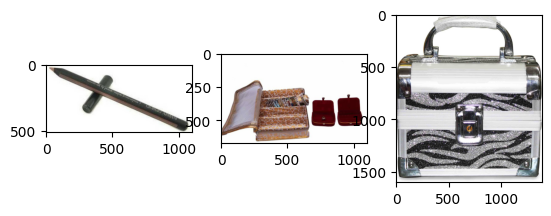

Watches


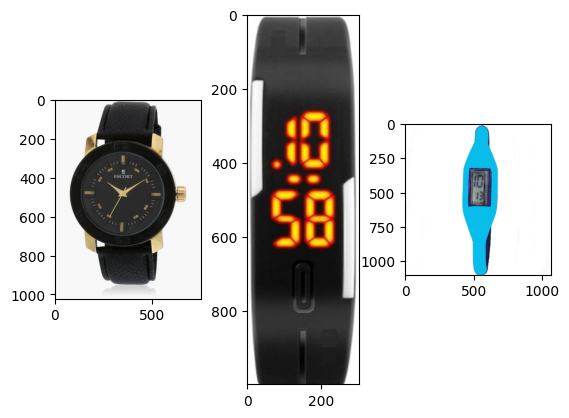

Home Furnishing


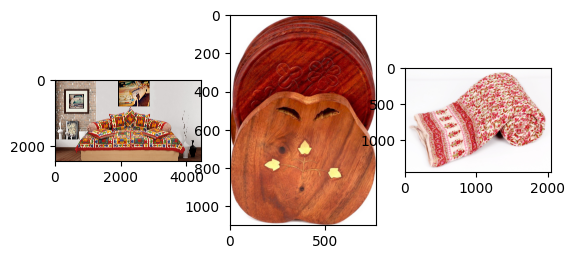

In [27]:
# Visualisation of examples

def list_fct(name) :
    list_image_name = [df.image[i] for i in range(len(df)) if df["class_"][i]==name]
    return list_image_name

list_Baby_Care=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Baby Care'"]
list_Beauty_and_Personal_Care=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Beauty and Personal Care"]
list_Computers=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Computers"]
list_Home_Decor_Festive_Need=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Home Decor & Festive Need"]
list_Watches=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Watches"]
list_Home_Furnishing=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Home Furnishing"]
list_Kitchen_Dining=[df.image[i] for i in range(len(df)) if df["class_"][i]=="Kitchen & Dining"]

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = im +'\\' + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

In [ ]:
# Détermination et affichage des descripteurs SIFT
sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(im +'\\' +df.image[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [ ]:
sys.version

## <a name="C52">5-2 : SIFT</a>

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [ ]:
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(im+'\\'+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")